In [1]:
pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/3e/6f/b3d59fac3869a7685e68aecdd35c336800bce8c8d3b45687bb82cf9a2848/pycaret-3.3.2-py3-none-any.whl.metadata
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached pyod-2.0.1-py3-none-any.whl
  Obtaining dependency information for imbalanced-learn>=0.12.0 from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhoste

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [2]:
# PyCaret 설치 (이미 설치되어 있으면 이 부분은 생략)
# !pip install pycaret

# 필요한 라이브러리 임포트
from pycaret.classification import *
import pandas as pd


In [83]:
# 데이터셋 로드 
df_networks = pd.read_csv('./최종org.csv')
df_org = pd.read_csv('org_fraud_df.csv')      
df_org_org = pd.read_csv('./df.csv')         

**df_networks + df_org**

In [84]:
df_networks.head()

,Unnamed: 0,node,birank_score,n1_q1,n1_med,n1_max,n2_q1,n2_med,n2_max,n1_size,n2_size,n2_ratioFraud,n2_ratioNonFraud,n2_binFraud
0,0,P1,3.524124,0.089009,0.089009,0.263799,1.361815,2.563140,5.707836,3338,10,0.0,0.0,0
1,1,P2,2.963409,0.090352,0.090352,0.262048,1.361815,2.563140,5.707836,2162,10,0.0,0.0,0
2,2,P3,2.940848,0.090028,0.090028,0.261724,1.440948,2.733309,5.707836,2174,9,0.0,0.0,0
3,3,P4,3.587685,0.090341,0.090341,0.262037,1.440948,2.733309,5.707836,3171,9,0.0,0.0,0
4,4,P5,2.777461,0.091686,0.091686,0.261622,1.440948,2.733309,5.707836,1747,9,0.0,0.0,0


In [85]:
df_org.head()

,Unnamed: 0.1,Unnamed: 0,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,...,month,day,income_to_age_group_mean,income_to_vehicle_value_ratio,payout_vs_avg,claim_frequency_factor,age_of_vehicle_binned,claim_frequency_binned,past_claims_binned,fraud_updated
0,0,0,33,Male,Married,34,35113.78,0,Changed,Own,...,JUL,18,0.985538,1.773456,-2043.087586,0.000000,Old,Very Low,NaN,1
1,1,1,44,Female,Married,90,38096.04,1,Changed,Own,...,JAN,1,0.999059,1.187957,1393.628265,0.000000,New,Very Low,NaN,2
2,2,2,29,Male,Not married,70,33753.00,1,Not changed,Rent,...,JUL,14,1.033729,1.659519,-288.787583,0.000000,Very Old,Very Low,NaN,0
3,3,3,33,Male,Married,79,35100.61,1,Changed,Rent,...,JUN,14,0.985168,3.531977,-1838.511132,0.285714,Old,Low,Some,1
4,4,4,51,Male,Married,46,39609.60,1,Changed,Rent,...,MAY,8,0.987488,1.616452,-2921.151735,0.500000,Very New,Moderate,Some,0


In [86]:
df_org['high_education_ind'] = df_org['high_education_ind'].astype('object')
df_org['policy_report_filed_ind'] = df_org['policy_report_filed_ind'].astype('object')
df_org['fraud_updated'] = df_org['fraud_updated'].astype('object')

##### 1. df_org : 재범주화된, 필요없는 컬럼 버림, updated fraud사용 
##### 2. df_networks : node, updated fraud, 필요없는 컬럼 버림

In [87]:
df_org = df_org.drop(columns = ['Unnamed: 0.1','Unnamed: 0','fraud', 'claim_frequency_binned','past_claims_binned','age_of_vehicle_binned'], axis = 1)

In [88]:
df_networks = df_networks.iloc[15:,:]

In [89]:
df_networks = df_networks.drop(columns = ['Unnamed: 0','node'], axis = 1)

In [106]:
df_networks.columns

Index(['index', 'birank_score', 'n1_q1', 'n1_med', 'n1_max', 'n2_q1', 'n2_med',
       'n2_max', 'n1_size', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud',
       'n2_binFraud'],
      dtype='object')

###### 3. df_org + df_networks concat

In [90]:
df_org = df_org.reset_index()

In [91]:
df_org

,index,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,...,vehicle_color,vehicle_weight,year,month,day,income_to_age_group_mean,income_to_vehicle_value_ratio,payout_vs_avg,claim_frequency_factor,fraud_updated
0,0,33,Male,Married,34,35113.78,0,Changed,Own,Monday,...,black,11640.448729,2017,JUL,18,0.985538,1.773456,-2043.087586,0.000000,1
1,1,44,Female,Married,90,38096.04,1,Changed,Own,Thursday,...,blue,9139.610936,2016,JAN,1,0.999059,1.187957,1393.628265,0.000000,2
2,2,29,Male,Not married,70,33753.00,1,Not changed,Rent,Tuesday,...,other,19810.168367,2016,JUL,14,1.033729,1.659519,-288.787583,0.000000,0
3,3,33,Male,Married,79,35100.61,1,Changed,Rent,Tuesday,...,black,4428.144436,2017,JUN,14,0.985168,3.531977,-1838.511132,0.285714,1
4,4,51,Male,Married,46,39609.60,1,Changed,Rent,Sunday,...,other,10119.559384,2017,MAY,8,0.987488,1.616452,-2921.151735,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12593,12593,58,Male,Married,73,40953.59,1,Changed,Rent,Monday,...,silver,11458.570276,2016,AUG,17,1.020995,1.724782,3828.642961,0.166667,0
12594,12594,44,Female,Married,45,38074.77,1,Changed,Own,Sunday,...,blue,15262.372430,2016,MAR,8,0.998501,1.161365,696.927091,0.125000,0
12595,12595,31,Female,Married,82,34437.23,1,Not changed,Own,Sunday,...,red,21667.112531,2017,MAY,15,0.966549,0.874887,1590.505056,0.333333,0
12596,12596,28,Female,Married,60,33360.11,0,Changed,Rent,Wednesday,...,other,9190.795536,2016,APR,1,1.021696,0.938482,-2275.950549,0.300000,2


In [92]:
df_networks = df_networks.reset_index()

In [93]:
df = pd.concat([df_networks,df_org], axis = 1 )

In [94]:
df.head()

,index,birank_score,n1_q1,n1_med,n1_max,n2_q1,n2_med,n2_max,n1_size,n2_size,...,vehicle_color,vehicle_weight,year,month,day,income_to_age_group_mean,income_to_vehicle_value_ratio,payout_vs_avg,claim_frequency_factor,fraud_updated
0,15,0.102467,2.563140,2.733309,3.524124,0.089009,0.095878,0.263799,3,4415,...,black,11640.448729,2017,JUL,18,0.985538,1.773456,-2043.087586,0.000000,1
1,16,0.089009,4.587598,5.651072,5.707836,0.090028,0.090341,0.263799,3,9971,...,blue,9139.610936,2016,JAN,1,0.999059,1.187957,1393.628265,0.000000,2
2,17,0.239009,4.587598,5.651072,5.707836,0.090028,0.090341,0.263799,3,9971,...,other,19810.168367,2016,JUL,14,1.033729,1.659519,-288.787583,0.000000,0
3,18,0.089009,4.587598,5.651072,5.707836,0.090028,0.090341,0.263799,3,9971,...,black,4428.144436,2017,JUN,14,0.985168,3.531977,-1838.511132,0.285714,1
4,19,0.239009,4.587598,5.651072,5.707836,0.090028,0.090341,0.263799,3,9971,...,other,10119.559384,2017,MAY,8,0.987488,1.616452,-2921.151735,0.500000,0


In [95]:
df=df.drop(columns='index',axis =1)
df_org = df_org.drop(columns='index',axis =1)

###### 1) networks, 2) 비교군 train test(unknwon) 분리 

In [96]:
# networks 
test_networks = df[df['fraud_updated'] == 2]
train_networks = df[(df['fraud_updated'] == 1) | (df['fraud_updated'] == 0)]

In [97]:
# org 
test_org = df_org[df_org['fraud_updated'] == 2]
train_org = df_org[(df_org['fraud_updated'] == 1) | (df_org['fraud_updated'] == 0)]

In [98]:
import numpy as np

### 여러 전처리 조합 + pycaret

In [94]:
# Convert the relevant columns to their appropriate data types

# Convert 'ind' columns to categorical types
train_org['gender'] = train_org['gender'].astype('category')
train_org['marital_status'] = train_org['marital_status'].astype('category')
df['high_education_ind'] = df['high_education_ind'].astype('category')
df['address_change_ind'] = df['address_change_ind'].astype('category')
df['living_status'] = df['living_status'].astype('category')
df['claim_day_of_week'] = df['claim_day_of_week'].astype('category')
df['accident_site'] = df['accident_site'].astype('category')
df['witness_present_ind'] = df['witness_present_ind'].astype('category')
df['channel'] = df['channel'].astype('category')
df['policy_report_filed_ind'] = df['policy_report_filed_ind'].astype('category')
df['vehicle_category'] = df['vehicle_category'].astype('category')
df['vehicle_color'] = df['vehicle_color'].astype('category')
df['fraud_updated'] = df['fraud'].astype('category')

# Convert numerical columns to the correct numeric types
df['income_to_age_group_mean'] = pd.to_numeric(df['income_to_age_group_mean'])
df['income_to_vehicle_value_ratio'] = pd.to_numeric(df['income_to_vehicle_value_ratio'])
df['payout_vs_avg'] = pd.to_numeric(df['payout_vs_avg'])
df['claim_frequency_factor'] = pd.to_numeric(df['claim_frequency_factor'])

# Display the updated dataframe's dtypes to confirm the changes
df.dtypes


age_of_driver                       int64
gender                           category
marital_status                   category
safty_rating                        int64
annual_income                     float64
high_education_ind               category
address_change_ind               category
living_status                    category
claim_day_of_week                category
accident_site                    category
past_num_of_claims                  int64
witness_present_ind              category
liab_prct                           int64
channel                          category
policy_report_filed_ind          category
claim_est_payout                  float64
age_of_vehicle                    float64
vehicle_category                 category
vehicle_price                     float64
vehicle_color                    category
vehicle_weight                    float64
fraud                            category
year                                int64
month                             

### Networks analysis 

In [101]:
import pandas as pd
from pycaret.classification import setup, compare_models, pull
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import numpy as np

def preprocess_data(data, missing_value_strategy, sampling_strategy, remove_corr_var=True):
    # 1. 결측치 처리
    if missing_value_strategy == 'mean':
        data = data.fillna(data.select_dtypes(include='number').mean())
    elif missing_value_strategy == 'drop':
        data = data.dropna()

    # 2. 범주형 변수 인코딩
    label_encoders = {}
    for column in data.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

    # 3. 변수 선택 (상관관계 높은 변수 중 하나 제거)
    if remove_corr_var: 
        numeric_data = data.select_dtypes(include=['number'])
        corr_matrix = numeric_data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
        print(to_drop)

        data = data.drop(columns=to_drop)

    # 4. 샘플링 전략 적용
    if sampling_strategy == 'undersampling':
        X = data.drop('fraud_updated', axis=1)
        y = data['fraud_updated']
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)
    elif sampling_strategy == 'oversampling':
        X = data.drop('fraud_updated', axis=1)
        y = data['fraud_updated']
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)

    return data

def run_pycaret_setup_and_compare(data):
    # PyCaret 환경 설정
    exp_clf = setup(data=data, target='fraud_updated', normalize=True, 
                    normalize_method='minmax', session_id=42)

    # 모델 비교 및 최적 모델 선정
    best_model = compare_models()

    # 최적 모델의 세부 정보 추출
    model_metrics = pull()
    best_model_name = model_metrics.iloc[0]['Model']
    best_precision = model_metrics.iloc[0]['Prec.']
    best_accuracy = model_metrics.iloc[0]['Accuracy']
    best_recall = model_metrics.iloc[0]['Recall']
    best_f1 = model_metrics.iloc[0]['F1']

    return best_model_name, best_precision, best_accuracy, best_recall, best_f1


# 조합 1: 결측치 평균 처리, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_1 = preprocess_data(train_networks.copy(), 'mean', 'undersampling')
result_1 = run_pycaret_setup_and_compare(processed_data_1)

# 조합 2: 결측치 평균 처리, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_2 = preprocess_data(train_networks.copy(), 'mean', 'oversampling')
result_2 = run_pycaret_setup_and_compare(processed_data_2)

# 조합 3: 결측치 행 삭제, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_3 = preprocess_data(train_networks.copy(), 'drop', 'undersampling')
result_3 = run_pycaret_setup_and_compare(processed_data_3)

# 조합 3: 결측치 행 삭제, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_4 = preprocess_data(train_networks.copy(), 'drop', 'oversampling')
result_4 = run_pycaret_setup_and_compare(processed_data_4)

print("Result 1:", result_1)
print("Result 2:", result_2)
print("Result 3:", result_3)


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud', 'payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(2760, 34)"
4,Transformed data shape,"(2760, 34)"
5,Transformed train set shape,"(1931, 34)"
6,Transformed test set shape,"(829, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6556,0.6969,0.6482,0.6580,0.6526,0.3112,0.3117,0.0720
catboost,CatBoost Classifier,0.6556,0.7088,0.6698,0.6518,0.6603,0.3112,0.3117,1.9780
gbc,Gradient Boosting Classifier,0.6535,0.7100,0.6688,0.6489,0.6583,0.3071,0.3076,0.1910
et,Extra Trees Classifier,0.6406,0.6888,0.6563,0.6377,0.6464,0.2812,0.2817,0.1090
lda,Linear Discriminant Analysis,0.6370,0.6957,0.6283,0.6400,0.6339,0.2738,0.2740,0.0180
ridge,Ridge Classifier,0.6364,0.6968,0.6262,0.6401,0.6328,0.2728,0.2731,0.0330
lr,Logistic Regression,0.6349,0.6975,0.6304,0.6367,0.6332,0.2697,0.2700,0.5320
rf,Random Forest Classifier,0.6334,0.6932,0.6346,0.6334,0.6331,0.2667,0.2674,0.1370
lightgbm,Light Gradient Boosting Machine,0.6297,0.6853,0.6315,0.6300,0.6304,0.2594,0.2597,0.4970
svm,SVM - Linear Kernel,0.5956,0.6871,0.6330,0.6275,0.5681,0.1899,0.2342,0.0180


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud', 'payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(14878, 34)"
4,Transformed data shape,"(14878, 34)"
5,Transformed train set shape,"(10414, 34)"
6,Transformed test set shape,"(4464, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8985,0.9480,0.8383,0.9531,0.8920,0.7970,0.8029,3.2140
rf,Random Forest Classifier,0.8970,0.9515,0.8421,0.9460,0.8909,0.7939,0.7989,0.5370
lightgbm,Light Gradient Boosting Machine,0.8960,0.9481,0.8383,0.9477,0.8896,0.7920,0.7974,0.5850
gbc,Gradient Boosting Classifier,0.8867,0.9420,0.8283,0.9379,0.8796,0.7734,0.7788,1.0770
et,Extra Trees Classifier,0.8766,0.9403,0.8510,0.8973,0.8734,0.7532,0.7545,0.3050
ada,Ada Boost Classifier,0.8648,0.9334,0.8548,0.8726,0.8635,0.7296,0.7300,0.2600
nb,Naive Bayes,0.8104,0.8811,0.8101,0.8114,0.8104,0.6207,0.6213,0.0260
dt,Decision Tree Classifier,0.8071,0.8071,0.8202,0.7993,0.8096,0.6142,0.6145,0.0720
lda,Linear Discriminant Analysis,0.8048,0.8810,0.8166,0.7981,0.8071,0.6096,0.6100,0.0350
lr,Logistic Regression,0.8046,0.8801,0.8118,0.8006,0.8060,0.6092,0.6095,0.0630


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud', 'payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(2756, 34)"
4,Transformed data shape,"(2756, 34)"
5,Transformed train set shape,"(1929, 34)"
6,Transformed test set shape,"(827, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6454,0.6961,0.6675,0.6397,0.6520,0.2909,0.2926,1.8840
lda,Linear Discriminant Analysis,0.6423,0.7008,0.6333,0.6453,0.6380,0.2847,0.2859,0.0170
lr,Logistic Regression,0.6402,0.7019,0.6302,0.6432,0.6353,0.2806,0.2817,0.0180
ridge,Ridge Classifier,0.6402,0.7013,0.6281,0.6440,0.6347,0.2806,0.2818,0.0170
ada,Ada Boost Classifier,0.6345,0.6914,0.6229,0.6371,0.6285,0.2691,0.2703,0.0680
et,Extra Trees Classifier,0.6262,0.6710,0.6343,0.6236,0.6280,0.2525,0.2533,0.1020
gbc,Gradient Boosting Classifier,0.6242,0.6848,0.6373,0.6218,0.6288,0.2482,0.2489,0.1930
rf,Random Forest Classifier,0.6221,0.6763,0.6280,0.6212,0.6238,0.2441,0.2449,0.1510
lightgbm,Light Gradient Boosting Machine,0.6200,0.6648,0.6363,0.6174,0.6261,0.2399,0.2406,0.4950
svm,SVM - Linear Kernel,0.5899,0.6764,0.5549,0.6349,0.5379,0.1804,0.2151,0.0170


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud', 'payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(14852, 34)"
4,Transformed data shape,"(14852, 34)"
5,Transformed train set shape,"(10396, 34)"
6,Transformed test set shape,"(4456, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8994,0.9472,0.8374,0.9560,0.8927,0.7988,0.8051,3.0060
lightgbm,Light Gradient Boosting Machine,0.8977,0.9465,0.8376,0.9522,0.8911,0.7955,0.8015,0.5580
rf,Random Forest Classifier,0.8962,0.9507,0.8394,0.9470,0.8899,0.7924,0.7976,0.5190
gbc,Gradient Boosting Classifier,0.8865,0.9416,0.8303,0.9354,0.8797,0.7730,0.7780,1.0170
et,Extra Trees Classifier,0.8733,0.9408,0.8486,0.8928,0.8701,0.7466,0.7476,0.2830
ada,Ada Boost Classifier,0.8636,0.9324,0.8561,0.8692,0.8625,0.7272,0.7275,0.2520
lda,Linear Discriminant Analysis,0.8064,0.8812,0.8172,0.8000,0.8085,0.6127,0.6130,0.0330
nb,Naive Bayes,0.8060,0.8763,0.8030,0.8083,0.8055,0.6120,0.6122,0.0260
lr,Logistic Regression,0.8056,0.8799,0.8111,0.8024,0.8067,0.6112,0.6113,0.0510
ridge,Ridge Classifier,0.8053,0.8810,0.8161,0.7990,0.8074,0.6106,0.6108,0.0260


Result 1: ('Ada Boost Classifier', 0.658, 0.6556, 0.6482, 0.6526)
Result 2: ('CatBoost Classifier', 0.9531, 0.8985, 0.8383, 0.892)
Result 3: ('CatBoost Classifier', 0.6397, 0.6454, 0.6675, 0.652)


#### 변수 중요도 

['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud', 'payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(14878, 34)"
4,Transformed data shape,"(14878, 34)"
5,Transformed train set shape,"(10414, 34)"
6,Transformed test set shape,"(4464, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8935,0.9494,0.8292,0.9515,0.8862,0.7869,0.7935
1,0.9002,0.9389,0.8273,0.9685,0.8923,0.8004,0.8090
2,0.8935,0.9465,0.8330,0.9476,0.8866,0.7869,0.7928
3,0.9098,0.9505,0.8484,0.9672,0.9039,0.8196,0.8258
4,0.8828,0.9427,0.8250,0.9326,0.8755,0.7656,0.7707
5,0.8915,0.9489,0.8212,0.9553,0.8831,0.7829,0.7907
6,0.8991,0.9464,0.8462,0.9462,0.8934,0.7983,0.8027
7,0.9126,0.9535,0.8599,0.9614,0.9078,0.8252,0.8298
8,0.9001,0.9503,0.8388,0.9562,0.8937,0.8002,0.8063


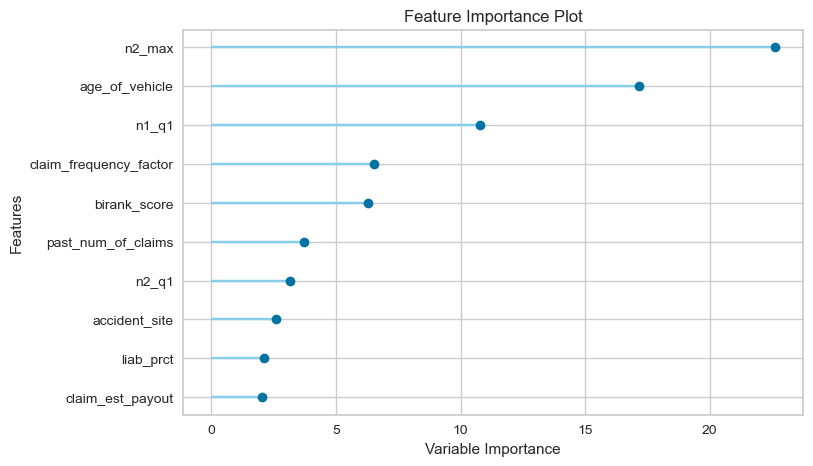

NameError: name 'plt' is not defined

In [103]:
from pycaret.classification import create_model, plot_model

# PyCaret 환경 설정
processed_data_2 = preprocess_data(train_networks.copy(), 'mean', 'oversampling')
exp_clf = setup(data=processed_data_2, target='fraud_updated', normalize=True, 
                normalize_method='minmax', session_id=42)

# CatBoost 모델 생성
catboost_model = create_model('catboost')

# 변수 중요도 시각화
plot_model(catboost_model, plot='feature')

# 변수 중요도 플롯을 출력
plt.show()

### Org (netwokrs 변수 뺀 버전) 

### NetWorks only version

In [102]:
import pandas as pd
from pycaret.classification import setup, compare_models, pull
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import numpy as np

def preprocess_data(data, missing_value_strategy, sampling_strategy, remove_corr_var=True):
    # 1. 결측치 처리
    if missing_value_strategy == 'mean':
        data = data.fillna(data.select_dtypes(include='number').mean())
    elif missing_value_strategy == 'drop':
        data = data.dropna()

    # 2. 범주형 변수 인코딩
    label_encoders = {}
    for column in data.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

    # 3. 변수 선택 (상관관계 높은 변수 중 하나 제거)
    if remove_corr_var: 
        numeric_data = data.select_dtypes(include=['number'])
        corr_matrix = numeric_data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
        print(to_drop)

        data = data.drop(columns=to_drop)

    # 4. 샘플링 전략 적용
    if sampling_strategy == 'undersampling':
        X = data.drop('fraud_updated', axis=1)
        y = data['fraud_updated']
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)
    elif sampling_strategy == 'oversampling':
        X = data.drop('fraud_updated', axis=1)
        y = data['fraud_updated']
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)

    return data

def run_pycaret_setup_and_compare(data):
    # PyCaret 환경 설정
    exp_clf = setup(data=data, target='fraud_updated', normalize=True, 
                    normalize_method='minmax', session_id=42)

    # 모델 비교 및 최적 모델 선정
    best_model = compare_models()

    # 최적 모델의 세부 정보 추출
    model_metrics = pull()
    best_model_name = model_metrics.iloc[0]['Model']
    best_precision = model_metrics.iloc[0]['Prec.']
    best_accuracy = model_metrics.iloc[0]['Accuracy']
    best_recall = model_metrics.iloc[0]['Recall']
    best_f1 = model_metrics.iloc[0]['F1']

    return best_model_name, best_precision, best_accuracy, best_recall, best_f1


# 조합 1: 결측치 평균 처리, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_1 = preprocess_data(train_org.copy(), 'mean', 'undersampling')
result_1 = run_pycaret_setup_and_compare(processed_data_1)

# 조합 2: 결측치 평균 처리, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_2 = preprocess_data(train_org.copy(), 'mean', 'oversampling')
result_2 = run_pycaret_setup_and_compare(processed_data_2)

# 조합 3: 결측치 행 삭제, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_3 = preprocess_data(train_org.copy(), 'drop', 'undersampling')
result_3 = run_pycaret_setup_and_compare(processed_data_3)

# 조합 3: 결측치 행 삭제, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_4 = preprocess_data(train_org.copy(), 'drop', 'oversampling')
result_4 = run_pycaret_setup_and_compare(processed_data_4)

print("Result 1:", result_1)
print("Result 2:", result_2)
print("Result 3:", result_3)


['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(2760, 28)"
4,Transformed data shape,"(2760, 28)"
5,Transformed train set shape,"(1931, 28)"
6,Transformed test set shape,"(829, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6499,0.7125,0.6688,0.6446,0.6559,0.2998,0.3006,1.7820
ada,Ada Boost Classifier,0.6489,0.6996,0.6378,0.6532,0.6452,0.2978,0.2980,0.0680
gbc,Gradient Boosting Classifier,0.6468,0.7051,0.6668,0.6406,0.6532,0.2936,0.2942,0.1850
ridge,Ridge Classifier,0.6385,0.6978,0.6376,0.6401,0.6384,0.2769,0.2773,0.0210
lda,Linear Discriminant Analysis,0.6375,0.6974,0.6355,0.6392,0.6369,0.2748,0.2753,0.0160
lr,Logistic Regression,0.6364,0.6982,0.6334,0.6383,0.6353,0.2727,0.2731,0.0160
rf,Random Forest Classifier,0.6307,0.6872,0.6367,0.6296,0.6323,0.2615,0.2622,0.1350
et,Extra Trees Classifier,0.6292,0.6731,0.6490,0.6241,0.6358,0.2583,0.2590,0.1030
lightgbm,Light Gradient Boosting Machine,0.6230,0.6803,0.6336,0.6208,0.6267,0.2459,0.2463,0.4770
nb,Naive Bayes,0.6199,0.6825,0.5197,0.6539,0.5770,0.2398,0.2464,0.0190


['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(14878, 28)"
4,Transformed data shape,"(14878, 28)"
5,Transformed train set shape,"(10414, 28)"
6,Transformed test set shape,"(4464, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8931,0.9472,0.8479,0.9324,0.8880,0.7862,0.7896,10.8160
lightgbm,Light Gradient Boosting Machine,0.8922,0.9479,0.8473,0.9309,0.8871,0.7843,0.7876,1.6000
rf,Random Forest Classifier,0.8823,0.9462,0.8467,0.9117,0.8779,0.7645,0.7666,0.5990
gbc,Gradient Boosting Classifier,0.8744,0.9386,0.8419,0.9007,0.8702,0.7488,0.7506,2.5270
et,Extra Trees Classifier,0.8692,0.9377,0.8450,0.8883,0.8660,0.7384,0.7395,1.0320
ada,Ada Boost Classifier,0.8492,0.9240,0.8533,0.8467,0.8499,0.6985,0.6987,0.6460
qda,Quadratic Discriminant Analysis,0.8212,0.8915,0.8210,0.8214,0.8211,0.6424,0.6425,0.0510
nb,Naive Bayes,0.8105,0.8845,0.8158,0.8076,0.8115,0.6211,0.6215,0.0230
ridge,Ridge Classifier,0.8054,0.8810,0.8168,0.7989,0.8076,0.6107,0.6111,0.0230
lda,Linear Discriminant Analysis,0.8054,0.8813,0.8168,0.7989,0.8076,0.6107,0.6111,0.0980


['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(2756, 28)"
4,Transformed data shape,"(2756, 28)"
5,Transformed train set shape,"(1929, 28)"
6,Transformed test set shape,"(827, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6496,0.6979,0.6571,0.6475,0.6514,0.2992,0.3001,6.7850
lr,Logistic Regression,0.6459,0.7036,0.6395,0.6482,0.6426,0.2919,0.2930,0.0500
ridge,Ridge Classifier,0.6423,0.7034,0.6332,0.6451,0.6381,0.2847,0.2856,0.0470
lda,Linear Discriminant Analysis,0.6418,0.7028,0.6343,0.6443,0.6383,0.2836,0.2845,0.0410
et,Extra Trees Classifier,0.6377,0.6736,0.6581,0.6332,0.6444,0.2753,0.2765,0.2790
ada,Ada Boost Classifier,0.6371,0.6934,0.6322,0.6385,0.6343,0.2743,0.2752,0.2240
gbc,Gradient Boosting Classifier,0.6309,0.6879,0.6447,0.6282,0.6356,0.2618,0.2625,0.7790
rf,Random Forest Classifier,0.6237,0.6776,0.6467,0.6186,0.6316,0.2473,0.2484,0.5540
lightgbm,Light Gradient Boosting Machine,0.6200,0.6704,0.6219,0.6199,0.6199,0.2400,0.2407,0.8020
svm,SVM - Linear Kernel,0.5993,0.6767,0.5452,0.6365,0.5484,0.1987,0.2218,0.0490


['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(14852, 28)"
4,Transformed data shape,"(14852, 28)"
5,Transformed train set shape,"(10396, 28)"
6,Transformed test set shape,"(4456, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8919,0.9470,0.8451,0.9323,0.8865,0.7838,0.7873,1.3700
catboost,CatBoost Classifier,0.8888,0.9467,0.8409,0.9300,0.8831,0.7776,0.7813,11.9730
rf,Random Forest Classifier,0.8824,0.9449,0.8405,0.9174,0.8772,0.7647,0.7676,1.8920
gbc,Gradient Boosting Classifier,0.8726,0.9370,0.8415,0.8976,0.8686,0.7453,0.7469,4.2080
et,Extra Trees Classifier,0.8686,0.9363,0.8453,0.8866,0.8654,0.7372,0.7381,0.4860
ada,Ada Boost Classifier,0.8483,0.9245,0.8563,0.8429,0.8495,0.6966,0.6968,0.9920
qda,Quadratic Discriminant Analysis,0.8160,0.8877,0.8120,0.8186,0.8152,0.6320,0.6321,0.0880
ridge,Ridge Classifier,0.8072,0.8811,0.8186,0.8005,0.8094,0.6145,0.6147,0.0970
nb,Naive Bayes,0.8071,0.8794,0.8201,0.7995,0.8096,0.6143,0.6146,0.0610
lda,Linear Discriminant Analysis,0.8071,0.8814,0.8178,0.8009,0.8092,0.6143,0.6145,0.0390


Result 1: ('CatBoost Classifier', 0.6446, 0.6499, 0.6688, 0.6559)
Result 2: ('CatBoost Classifier', 0.9324, 0.8931, 0.8479, 0.888)
Result 3: ('CatBoost Classifier', 0.6475, 0.6496, 0.6571, 0.6514)


In [108]:
train_networks_only = train_networks[['birank_score', 'n1_q1', 'n1_med', 'n1_max', 'n2_q1', 'n2_med',
       'n2_max', 'n1_size', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud',
       'n2_binFraud', 'fraud_updated']]

In [109]:
import pandas as pd
from pycaret.classification import setup, compare_models, pull
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import numpy as np

def preprocess_data(data, missing_value_strategy, sampling_strategy, remove_corr_var=True):
    # 1. 결측치 처리
    if missing_value_strategy == 'mean':
        data = data.fillna(data.select_dtypes(include='number').mean())
    elif missing_value_strategy == 'drop':
        data = data.dropna()

    # 2. 범주형 변수 인코딩
    label_encoders = {}
    for column in data.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

    # 3. 변수 선택 (상관관계 높은 변수 중 하나 제거)
    if remove_corr_var: 
        numeric_data = data.select_dtypes(include=['number'])
        corr_matrix = numeric_data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
        print(to_drop)

        data = data.drop(columns=to_drop)

    # 4. 샘플링 전략 적용
    if sampling_strategy == 'undersampling':
        X = data.drop('fraud_updated', axis=1)
        y = data['fraud_updated']
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)
    elif sampling_strategy == 'oversampling':
        X = data.drop('fraud_updated', axis=1)
        y = data['fraud_updated']
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)

    return data

def run_pycaret_setup_and_compare(data):
    # PyCaret 환경 설정
    exp_clf = setup(data=data, target='fraud_updated', normalize=True, 
                    normalize_method='minmax', session_id=42)

    # 모델 비교 및 최적 모델 선정
    best_model = compare_models()

    # 최적 모델의 세부 정보 추출
    model_metrics = pull()
    best_model_name = model_metrics.iloc[0]['Model']
    best_precision = model_metrics.iloc[0]['Prec.']
    best_accuracy = model_metrics.iloc[0]['Accuracy']
    best_recall = model_metrics.iloc[0]['Recall']
    best_f1 = model_metrics.iloc[0]['F1']

    return best_model_name, best_precision, best_accuracy, best_recall, best_f1


# 조합 1: 결측치 평균 처리, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_1 = preprocess_data(train_networks_only.copy(), 'mean', 'undersampling')
result_1 = run_pycaret_setup_and_compare(processed_data_1)

# 조합 2: 결측치 평균 처리, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_2 = preprocess_data(train_networks_only.copy(), 'mean', 'oversampling')
result_2 = run_pycaret_setup_and_compare(processed_data_2)

# 조합 3: 결측치 행 삭제, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_3 = preprocess_data(train_networks_only.copy(), 'drop', 'undersampling')
result_3 = run_pycaret_setup_and_compare(processed_data_3)

# 조합 3: 결측치 행 삭제, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_4 = preprocess_data(train_networks_only.copy(), 'drop', 'oversampling')
result_4 = run_pycaret_setup_and_compare(processed_data_4)

print("Result 1:", result_1)
print("Result 2:", result_2)
print("Result 3:", result_3)


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(2760, 7)"
4,Transformed data shape,"(2760, 7)"
5,Transformed train set shape,"(1931, 7)"
6,Transformed test set shape,"(829, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5199,0.5240,0.5082,0.5184,0.5110,0.0399,0.0400,0.0390
gbc,Gradient Boosting Classifier,0.5122,0.5177,0.5093,0.5110,0.5086,0.0243,0.0242,0.0480
lightgbm,Light Gradient Boosting Machine,0.5111,0.5155,0.5010,0.5099,0.5037,0.0223,0.0223,0.3180
lda,Linear Discriminant Analysis,0.5096,0.5120,0.6025,0.5101,0.5508,0.0190,0.0186,0.0140
catboost,CatBoost Classifier,0.5096,0.5161,0.4917,0.5084,0.4982,0.0192,0.0191,0.6130
lr,Logistic Regression,0.5086,0.5143,0.5208,0.5104,0.5120,0.0172,0.0166,1.7400
ridge,Ridge Classifier,0.5086,0.5144,0.5953,0.5090,0.5466,0.0170,0.0164,0.0140
rf,Random Forest Classifier,0.5080,0.5123,0.4906,0.5073,0.4973,0.0161,0.0159,0.0740
dt,Decision Tree Classifier,0.5065,0.5146,0.4844,0.5056,0.4934,0.0130,0.0127,0.0120
et,Extra Trees Classifier,0.5060,0.5126,0.4834,0.5049,0.4925,0.0119,0.0117,0.0630


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(14878, 7)"
4,Transformed data shape,"(14878, 7)"
5,Transformed train set shape,"(10414, 7)"
6,Transformed test set shape,"(4464, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5355,0.5503,0.5433,0.5350,0.5388,0.0711,0.0711,0.1140
et,Extra Trees Classifier,0.5350,0.5519,0.5293,0.5353,0.5320,0.0701,0.0701,0.0930
lightgbm,Light Gradient Boosting Machine,0.5346,0.5510,0.5345,0.5345,0.5343,0.0691,0.0692,0.4220
catboost,CatBoost Classifier,0.5345,0.5516,0.5368,0.5343,0.5353,0.0689,0.0690,1.1380
dt,Decision Tree Classifier,0.5341,0.5504,0.5277,0.5343,0.5308,0.0682,0.0682,0.0150
gbc,Gradient Boosting Classifier,0.5317,0.5517,0.5445,0.5306,0.5371,0.0634,0.0635,0.1050
ada,Ada Boost Classifier,0.5266,0.5363,0.5068,0.5279,0.5164,0.0532,0.0534,0.0630
knn,K Neighbors Classifier,0.5200,0.5318,0.2984,0.5347,0.3744,0.0399,0.0442,0.0920
ridge,Ridge Classifier,0.5095,0.5172,0.6668,0.5075,0.5751,0.0190,0.0198,0.0140
lda,Linear Discriminant Analysis,0.5095,0.5175,0.6998,0.5070,0.5879,0.0190,0.0204,0.0160


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(2760, 7)"
4,Transformed data shape,"(2760, 7)"
5,Transformed train set shape,"(1931, 7)"
6,Transformed test set shape,"(829, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5199,0.5240,0.5082,0.5184,0.5110,0.0399,0.0400,0.0390
gbc,Gradient Boosting Classifier,0.5122,0.5177,0.5093,0.5110,0.5086,0.0243,0.0242,0.0490
lightgbm,Light Gradient Boosting Machine,0.5111,0.5155,0.5010,0.5099,0.5037,0.0223,0.0223,0.2970
lda,Linear Discriminant Analysis,0.5096,0.5120,0.6025,0.5101,0.5508,0.0190,0.0186,0.0130
catboost,CatBoost Classifier,0.5096,0.5161,0.4917,0.5084,0.4982,0.0192,0.0191,0.6360
lr,Logistic Regression,0.5086,0.5143,0.5208,0.5104,0.5120,0.0172,0.0166,0.0160
ridge,Ridge Classifier,0.5086,0.5144,0.5953,0.5090,0.5466,0.0170,0.0164,0.0120
rf,Random Forest Classifier,0.5080,0.5123,0.4906,0.5073,0.4973,0.0161,0.0159,0.0770
dt,Decision Tree Classifier,0.5065,0.5146,0.4844,0.5056,0.4934,0.0130,0.0127,0.0120
et,Extra Trees Classifier,0.5060,0.5126,0.4834,0.5049,0.4925,0.0119,0.0117,0.0700


['n1_med', 'n1_max', 'n2_med', 'n2_size', 'n2_ratioFraud', 'n2_ratioNonFraud']


,Description,Value
0,Session id,42
1,Target,fraud_updated
2,Target type,Binary
3,Original data shape,"(14878, 7)"
4,Transformed data shape,"(14878, 7)"
5,Transformed train set shape,"(10414, 7)"
6,Transformed test set shape,"(4464, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5355,0.5503,0.5433,0.5350,0.5388,0.0711,0.0711,0.1270
et,Extra Trees Classifier,0.5350,0.5519,0.5293,0.5353,0.5320,0.0701,0.0701,0.1080
lightgbm,Light Gradient Boosting Machine,0.5346,0.5510,0.5345,0.5345,0.5343,0.0691,0.0692,0.4200
catboost,CatBoost Classifier,0.5345,0.5516,0.5368,0.5343,0.5353,0.0689,0.0690,0.8910
dt,Decision Tree Classifier,0.5341,0.5504,0.5277,0.5343,0.5308,0.0682,0.0682,0.0150
gbc,Gradient Boosting Classifier,0.5317,0.5517,0.5445,0.5306,0.5371,0.0634,0.0635,0.1060
ada,Ada Boost Classifier,0.5266,0.5363,0.5068,0.5279,0.5164,0.0532,0.0534,0.0620
knn,K Neighbors Classifier,0.5200,0.5318,0.2984,0.5347,0.3744,0.0399,0.0442,0.0790
ridge,Ridge Classifier,0.5095,0.5172,0.6668,0.5075,0.5751,0.0190,0.0198,0.0150
lda,Linear Discriminant Analysis,0.5095,0.5175,0.6998,0.5070,0.5879,0.0190,0.0204,0.0160


Result 1: ('Ada Boost Classifier', 0.5184, 0.5199, 0.5082, 0.511)
Result 2: ('Random Forest Classifier', 0.535, 0.5355, 0.5433, 0.5388)
Result 3: ('Ada Boost Classifier', 0.5184, 0.5199, 0.5082, 0.511)
